# ARIMA预测

## 导入需要的模块

In [1]:
import itertools
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

## 加载数据集

   waterlevel
0        0.27
1        0.26
2        0.27
3        0.28
4        0.28


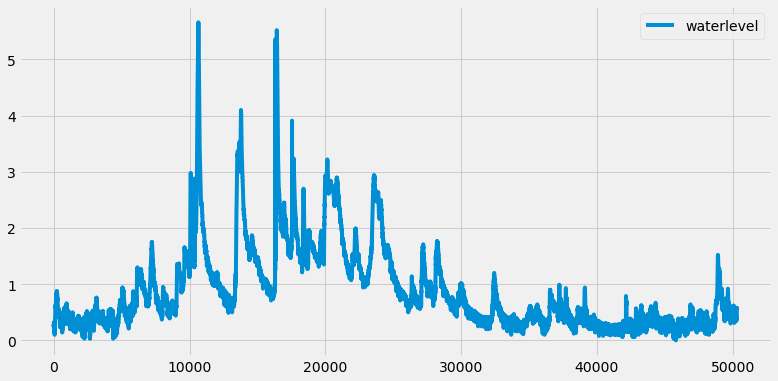

In [2]:
# 加载数据集
# 采用 python内置数据集
# 美国夏威夷莫纳罗亚火山天文台空气样本中大气二氧化碳数据
data = pd.read_csv('./dataset/flood_data.csv',usecols=[1],engine='python',skipfooter=3)
print(data.head())
data.plot(figsize=(12,6))
plt.show()

## ARIMA模型定阶——选取AIC最小

In [3]:
# 定阶
p = d = q = range(0,2)

p_d_q = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in p_d_q]
print(p_d_q)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

for param in p_d_q:
    for param_season in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                data,
                order=param,
                seasonal_order=param_season,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit()
            print('ARIMA{}x{} -AIC:{}'.format(param,param_season,res.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) -AIC:159960.35641458846
ARIMA(0, 0, 0)x(0, 0, 1, 12) -AIC:95889.38645028365
ARIMA(0, 0, 0)x(0, 1, 0, 12) -AIC:-96562.84740603065
ARIMA(0, 0, 0)x(0, 1, 1, 12) -AIC:-96950.6294146948
ARIMA(0, 0, 0)x(1, 0, 0, 12) -AIC:-96639.415176283
ARIMA(0, 0, 0)x(1, 0, 1, 12) -AIC:-97070.64057424817
ARIMA(0, 0, 0)x(1, 1, 0, 12) -AIC:-97085.71902188758
ARIMA(0, 0, 0)x(1, 1, 1, 12) -AIC:-98002.68400918225
ARIMA(0, 0, 1)x(0, 0, 0, 12) -AIC:92953.50048422541
ARIMA(0, 0, 1)x(0, 0, 1, 12) -AIC:32524.581556397156
ARIMA(0, 0, 1)x(0, 1, 0, 12) -AIC:-120121.25086262153
ARIMA(0, 0, 1)x(0, 1, 1, 12) -AIC:-120252.37401040681
ARIMA(0, 0, 1)x(1, 0, 0, 12) -AIC:-120242.4583523286
ARIMA(0, 0, 1)x(1, 0, 1, 12) -AIC:-120394.39810183621
ARIMA(0, 0, 1)x(1, 1, 0, 12) -AIC:-120266.65995690362
ARIMA(0, 0, 1)x(1, 1, 1, 12) -AIC:-120262.00378882416
ARIMA(0, 1, 0)x(0, 0, 0, 12) -AIC:-164455.53579351175
ARIMA(0, 1, 0)x(0, 0, 1, 12) -AIC:-164427.28930511966
ARIMA(0, 1, 0)x(0, 1, 0, 12) -AIC:-128571.84

$\,ARIMA(1,1,1) \times (1,1,1,12)\,$最好

## 拟合ARIMA模型

In [ ]:
model = sm.tsa.statespace.SARIMAX(data,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)
res = model.fit()
print(res.summary().tables[1])

## 检测模型——保证残差稳定

In [ ]:
res.plot_diagnostics(figsize=(12,12))
plt.show()

## 预测

In [ ]:
pred = res.get_prediction(start=pd.to_datetime('1998-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = data['1990':].plot(label='Observed',figsize=(12, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
 
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
 
plt.show()

In [ ]:
data_forecasted = pred.predicted_mean
data_truth = data['1998-01-01':]
 
# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))